<a href="https://colab.research.google.com/github/cbittel/toolbox/blob/master/BCRA_API_Estad%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Estadísticas Monetarias de la República Argentina](http://bcra.gob.ar/Imagenes/header/encabezado.jpg)

# Estadísticas Monetarias de la República Argentina
## Estadísticas BCRA - Sitio que compila los datos publicados por el BCRA.

In [0]:
import requests
import json

In [0]:
def get_estadisticas_bcra(endpoint):
    ''' 
    Funcion que toma el endpoint, y obtiene el resultado de la consulta a la 
    API Estadísticas BCRA de la web api.estadisticasbcra.com 
    Devuelve una lista con los datos JSON de respuesta convertidos en Dict.
    '''
    result_search =[]
    try:
        response = requests.get(api_url_base + '/' + endpoint, headers=headers)
        if response.status_code == 200:
            result = json.loads(response.text)
            result_search = result
    except ValueError as e:
            result_search = "Error direccion " + str(e)
    except:
            result_search = "Error OTRO " # + str(e)
            
    return result_search


In [0]:
api_token = 'your_api_token_here'
api_url_base = 'https://api.estadisticasbcra.com'

In [0]:
headers = {'Authorization':'BEARER {0}'.format(api_token)}

In [0]:
# Prints the nicely formatted dictionary
import pprint

In [117]:
endpoint='usd_of_minorista'

dict_usd_of_minorista = get_estadisticas_bcra(endpoint)

# Prints the nicely formatted dictionary
pprint.pprint(dict_usd_of_minorista[:10])
# Sets 'pretty_dict_str' to 
#pretty_dict_str = pprint.pformat(dict_usd_of_minorista)
#print(pretty_dict_str)

[{'d': '2010-06-01', 'v': 3.96},
 {'d': '2010-06-02', 'v': 3.96},
 {'d': '2010-06-03', 'v': 3.95},
 {'d': '2010-06-04', 'v': 3.95},
 {'d': '2010-06-07', 'v': 3.95},
 {'d': '2010-06-08', 'v': 3.95},
 {'d': '2010-06-09', 'v': 3.95},
 {'d': '2010-06-10', 'v': 3.95},
 {'d': '2010-06-11', 'v': 3.95},
 {'d': '2010-06-14', 'v': 3.96}]


In [118]:
endpoint='usd'

dict_usd_no_oficial = get_estadisticas_bcra(endpoint)

# Prints the nicely formatted dictionary
pprint.pprint(dict_usd_no_oficial[:10])
# Sets 'pretty_dict_str' to 
#pretty_dict_str = pprint.pformat(dict_usd_of_minorista)
#print(pretty_dict_str)

[{'d': '2000-05-24', 'v': 1.0005},
 {'d': '2000-05-25', 'v': 1.0005},
 {'d': '2000-05-26', 'v': 1.0004},
 {'d': '2000-05-29', 'v': 1.0007},
 {'d': '2000-05-30', 'v': 1.0009},
 {'d': '2000-05-31', 'v': 1.001},
 {'d': '2000-06-01', 'v': 1.0007},
 {'d': '2000-06-02', 'v': 1.0011},
 {'d': '2000-06-05', 'v': 1.0011},
 {'d': '2000-06-06', 'v': 1.001}]




---



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
usd_of_minorista_df = pd.DataFrame(dict_usd_of_minorista,columns=['d','v'])
# convert the 'Date' column to datetime format 
usd_of_minorista_df['date']= pd.to_datetime(usd_of_minorista_df['d']) 
usd_of_minorista_df.set_index('date', inplace=True, drop=True)  
usd_of_minorista_df.dropna()
usd_of_minorista_df.drop(columns='d',inplace=True)
usd_of_minorista_df.rename(columns={'v':'oficial'},inplace=True)

# Check the format of 'Date' column 
#pd.DataFrame(usd_of_minorista_df.unstack()).info() 
usd_of_minorista_df.info() 
display(usd_of_minorista_df.sample(5)) 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2378 entries, 2010-06-01 to 2020-02-28
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   oficial  2378 non-null   float64
dtypes: float64(1)
memory usage: 37.2 KB


,oficial
date,
2013-05-17,5.28
2013-01-22,5.00
2018-02-05,19.80
2015-05-07,8.98
2017-01-12,16.08


In [70]:
usd_noof_minorista_df = pd.DataFrame(dict_usd_no_oficial,columns=['d','v'])
# convert the 'Date' column to datetime format 
usd_noof_minorista_df['date']= pd.to_datetime(usd_noof_minorista_df['d']) 
usd_noof_minorista_df.set_index('date', inplace=True, drop=True) 
usd_noof_minorista_df.dropna()
usd_noof_minorista_df.drop(columns='d',inplace=True)
usd_noof_minorista_df.rename(columns={'v':'no_oficial'},inplace=True) 

# Check the format of 'Date' column 
usd_noof_minorista_df.info()
display(usd_noof_minorista_df.sample(5)) 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4975 entries, 2000-05-24 to 2020-02-28
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   no_oficial  4975 non-null   float64
dtypes: float64(1)
memory usage: 77.7 KB


,no_oficial
date,
2008-03-13,3.1800
2002-05-29,3.6200
2008-04-22,3.2300
2000-12-14,1.0003
2019-04-10,43.7000


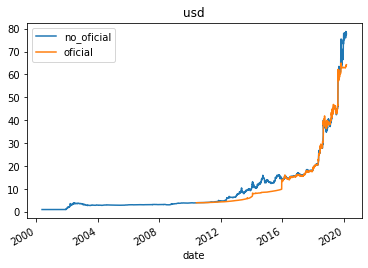

In [71]:
ax = usd_noof_minorista_df.plot(title=endpoint)
usd_of_minorista_df.plot(ax=ax)

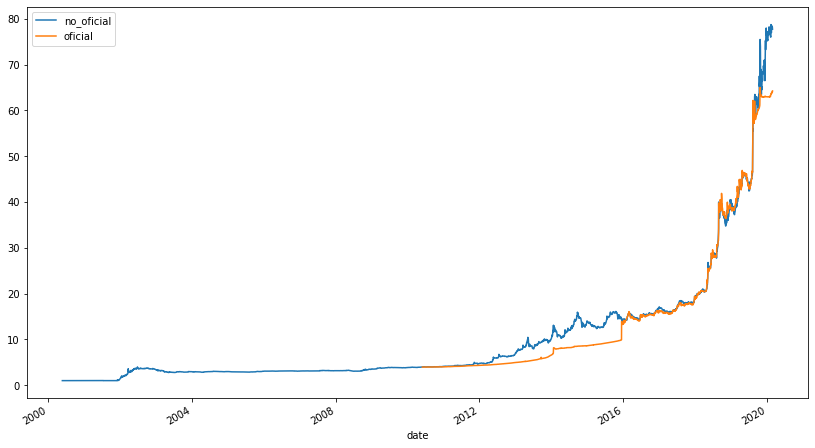

In [72]:

fig, ax = plt.subplots(figsize=(14, 8))
ax.xaxis_date()
usd_noof_minorista_df.plot(ax=ax)
usd_of_minorista_df.plot(ax=ax)
    



---

##Join DataFrame


In [73]:
usd_minorista_df = usd_noof_minorista_df.join(usd_of_minorista_df, rsuffix='_aiv', lsuffix='_mtv', how='outer')
display(usd_minorista_df.info())
display(usd_minorista_df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4979 entries, 2000-05-24 to 2020-02-28
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   no_oficial  4975 non-null   float64
 1   oficial     2378 non-null   float64
dtypes: float64(2)
memory usage: 116.7 KB


None

,no_oficial,oficial
date,,
2000-05-24,1.0005,NaN
2000-05-25,1.0005,NaN
2000-05-26,1.0004,NaN
2000-05-29,1.0007,NaN
2000-05-30,1.0009,NaN
...,...,...
2020-02-20,78.5000,63.87
2020-02-21,78.0000,63.99
2020-02-26,78.2500,64.09


In [74]:
usd_minorista_df.describe()

,no_oficial,oficial
count,4975.000000,2378.000000
mean,9.967793,15.894445
std,13.490405,15.683659
min,0.996500,3.950000
25%,3.065000,4.810000
50%,3.880000,8.945000
75%,13.240000,17.640000
max,78.750000,65.000000


In [75]:
# fill NaN in oficial with no_oficial for missing values
usd_minorista_df['oficial'] = usd_minorista_df.apply(
    lambda row: row['no_oficial'] if np.isnan(row['oficial']) else row['oficial'],
    axis=1
)
display(usd_minorista_df.info())
display(usd_minorista_df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4979 entries, 2000-05-24 to 2020-02-28
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   no_oficial  4975 non-null   float64
 1   oficial     4979 non-null   float64
dtypes: float64(2)
memory usage: 116.7 KB


None

,no_oficial,oficial
date,,
2000-05-24,1.0005,1.0005
2000-05-25,1.0005,1.0005
2000-05-26,1.0004,1.0004
2000-05-29,1.0007,1.0007
2000-05-30,1.0009,1.0009
...,...,...
2020-02-20,78.5000,63.8700
2020-02-21,78.0000,63.9900
2020-02-26,78.2500,64.0900


In [76]:
display(usd_minorista_df[usd_minorista_df.no_oficial.isna()])

,no_oficial,oficial
date,,
2011-12-30,NaN,4.34
2012-12-31,NaN,4.95
2014-12-24,NaN,8.56
2015-12-31,NaN,13.40


In [0]:
# nearest funciona para obtener un índice cercano cuando el índice no existe,en este caso los índices sí existen.
#usd_minorista_df.iloc[usd_minorista_df.index.get_loc(pd.to_datetime('2011-12-30'), method='nearest')]['no_oficial']
usd_minorista_df.dropna(inplace=True)

###Mostrar dataframe final en forma interactiva

In [78]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [0]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [80]:
@interact
def show_articles_more_than(column=['no_oficial', 'oficial'], x=(usd_minorista_df['no_oficial'].max() / 2)):
    return usd_minorista_df.loc[usd_minorista_df[column] > x]

interactive(children=(Dropdown(description='column', options=('no_oficial', 'oficial'), value='no_oficial'), F…

In [81]:
usd_minorista_df.reset_index(inplace=True)
usd_minorista_df['date'].min()

Timestamp('2000-05-24 00:00:00')

In [82]:
@interact
def show_articles_more_than(column=['date'], x='2000-05-24'):
    return usd_minorista_df.loc[usd_minorista_df[column] > x]

interactive(children=(Dropdown(description='column', options=('date',), value='date'), Text(value='2000-05-24'…

In [83]:
@interact
def show_articles_more_than(column=['date'], x=widgets.DatePicker(value=pd.to_datetime('2018-01-01'),)):
    return usd_minorista_df.loc[usd_minorista_df[column] > pd.to_datetime(x)]

interactive(children=(Dropdown(description='column', options=('date',), value='date'), DatePicker(value=Timest…

####matplotlib dinámico

In [84]:
'''
import cufflinks as cf
#from plotly.offline import iplot
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode()

usd_minorista_df.iplot(kind='scatter', x=x, y=y, mode='markers', 
             xTitle=x.title(), yTitle=y.title(), 
             title=f'{y.title()} vs {x.title()}',
            theme=theme, colorscale=colorscale)
'''

"\nimport cufflinks as cf\n#from plotly.offline import iplot\nfrom plotly.offline import init_notebook_mode, iplot\ninit_notebook_mode()\n\nusd_minorista_df.iplot(kind='scatter', x=x, y=y, mode='markers', \n             xTitle=x.title(), yTitle=y.title(), \n             title=f'{y.title()} vs {x.title()}',\n            theme=theme, colorscale=colorscale)\n"

In [85]:

@interact
def scatter_plot(x=list(usd_minorista_df.select_dtypes('number').columns), 
                 y=list(usd_minorista_df.select_dtypes('number').columns)[1:],
                 kind=list([
                    'scatter',
                    'box',
                    'kde',
                    'bar',
                    'barh', 
                    'hist',
                    'area',
                    'hexbin',
                    'pie']
                 ), 
                 colorscale=list(plt.colormaps())):
    
        usd_minorista_df.plot(kind=kind, x=x, y=y, colormap=colorscale)

interactive(children=(Dropdown(description='x', options=('no_oficial', 'oficial'), value='no_oficial'), Dropdo…

In [0]:
def selection_range_slider(start_date, end_date, freq='D'):
  import ipywidgets as widgets
  import pandas as pd
  from datetime import datetime

  dates = pd.date_range(start_date, end_date, freq=freq)

  options = [(date.strftime(' %d %b \'%y '), date) for date in dates]
  index = (0, len(options)-1)

  return widgets.SelectionRangeSlider(
                    options=options,
                    index=index,
                    description='Fechas: ',
                    orientation='horizontal',
                    layout={'width': '600px'}
          )

In [0]:
def plot_usd_minorista_in_date_range(date_range):
  start_date = date_range[0]
  end_date = date_range[1]
  #Make a boolean mask. start_date and end_date can be datetime.datetimes, np.datetime64s, pd.Timestamps, or even datetime strings:
  #greater than the start date and smaller than the end date
  mask = (usd_minorista_df['date'] > start_date) & (usd_minorista_df['date'] <= end_date)
  #Select the sub-DataFrame and re-assign to df.
  df_plot = usd_minorista_df.loc[mask].copy()

  fig, ax = plt.subplots(figsize=(14, 8))
  ax.xaxis_date()
  df_plot.plot(x='date', ax=ax)
#  usd_noof_minorista_df.plot(ax=ax)
#  usd_of_minorista_df.plot(ax=ax)
    

In [88]:
widgets.interact(
    plot_usd_minorista_in_date_range,
    date_range=selection_range_slider(usd_minorista_df['date'].min(),usd_minorista_df['date'].max())
);

interactive(children=(SelectionRangeSlider(description='Fechas: ', index=(0, 7219), layout=Layout(width='600px…



---



## Persist DataFrame

In [89]:
# para Colab, excluir para Anaconda
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
import pickle

In [0]:
# para Anaconda:
path = ''

# para Colab, CB:
path = 'gdrive/My Drive/Data Science For All - #DS4A/Practicum/data/'

In [0]:
with open('{}cotizaciones.pkl'.format(path), 'wb') as f:
    pickle.dump(usd_minorista_df, f)



---



## *«Funcionalizar»* la lectura del DataFrame.

In [93]:
# para Colab, excluir para Anaconda
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# para Anaconda:
path = ''

# para Colab, CB:
path = 'gdrive/My Drive/Data Science For All - #DS4A/Practicum/data/'

### Código ejemplo para incluir desde otro código/notebook.

In [0]:
import os
import pickle

In [106]:
# file is open only in the scope of <with> sentence, out of the block it closes automatically.
with open('{}cotizaciones.pkl'.format(path), 'rb') as f:
    usd_minorista_df = pickle.load(f)

usd_minorista_df = usd_minorista_df.set_index('date')
usd_minorista_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4975 entries, 2000-05-24 to 2020-02-28
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   no_oficial  4975 non-null   float64
 1   oficial     4975 non-null   float64
dtypes: float64(2)
memory usage: 116.6 KB


In [0]:
def get_usd_price(str_date_YMD):
    dt = pd.to_datetime(str_date_YMD)
    #print (dt)
    #print (usd_minorista_df.index.get_loc(dt, method='nearest'))
    idx = usd_minorista_df.index[usd_minorista_df.index.get_loc(dt, method='nearest')]
    #print (idx)
    cot = usd_minorista_df.iloc[usd_minorista_df.index.get_loc(dt, method='nearest')]
    #print(cot)
    return cot

####Test de llamada de la función get_usd_price(...)

In [107]:
str_date_YMD = ['2011-12-29', '2011-12-30', '2011-12-31', 
                '2012-12-30', '2012-12-31', '2013-01-01', 
                '2014-12-23', '2014-12-24', '2014-12-25', 
                '2015-12-30', '2015-12-31', '2016-01-01']
for each_date in str_date_YMD:
  row = get_usd_price(each_date)
  print(row)

no_oficial    4.735
oficial       4.340
Name: 2011-12-29 00:00:00, dtype: float64
no_oficial    4.735
oficial       4.340
Name: 2011-12-29 00:00:00, dtype: float64
no_oficial    4.735
oficial       4.340
Name: 2011-12-29 00:00:00, dtype: float64
no_oficial    6.80
oficial       4.95
Name: 2012-12-28 00:00:00, dtype: float64
no_oficial    6.91
oficial       4.96
Name: 2013-01-02 00:00:00, dtype: float64
no_oficial    6.91
oficial       4.96
Name: 2013-01-02 00:00:00, dtype: float64
no_oficial    13.38
oficial        8.61
Name: 2014-12-23 00:00:00, dtype: float64
no_oficial    13.38
oficial        8.61
Name: 2014-12-23 00:00:00, dtype: float64
no_oficial    13.38
oficial        8.61
Name: 2014-12-23 00:00:00, dtype: float64
no_oficial    14.32
oficial       13.28
Name: 2015-12-30 00:00:00, dtype: float64
no_oficial    14.32
oficial       13.28
Name: 2015-12-30 00:00:00, dtype: float64
no_oficial    14.32
oficial       13.28
Name: 2015-12-30 00:00:00, dtype: float64
